# Линейная регрессия — Предсказание цены бриллианта

**Линейная регрессия** — один из фундаментальных методов машинного обучения, который моделирует
зависимость целевой переменной от набора признаков в виде линейной комбинации этих признаков.

## Импорт библиотек

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


## Загрузка и описание датасета

https://www.kaggle.com/datasets/shivam2503/diamonds

### Краткое описание
Датасет содержит информацию о ~54 000 бриллиантах с их физическими и качественными характеристиками. Исходно задача регрессии (предсказание цены), но может использоваться для классификации по категориям огранки (cut) или другим порядковым признакам. Включает как числовые, так и порядковые категориальные признаки.

### Параметры (признаки)

| Признак | Описание |
|---------|----------|
| `carat` | Масса бриллианта в каратах (1 карат = 0.2 г) |
| `cut` | Качество огранки: **Fair** → **Good** → **Very Good** → **Premium** → **Ideal** |
| `color` | Цвет бриллианта: **J** (худший, желтоватый) → **I** → **H** → **G** → **F** → **E** → **D** (лучший, бесцветный) |
| `clarity` | Чистота бриллианта: **I1** (включения видны) → **SI2** → **SI1** → **VS2** → **VS1** → **VVS2** → **VVS1** → **IF** (безупречный) |
| `depth` | Процент глубины = `z / mean(x, y) × 100` — отношение высоты к среднему диаметру |
| `table` | Ширина верхней грани (площадки) в процентах от наибольшего диаметра |
| `x` | Длина бриллианта (мм) |
| `y` | Ширина бриллианта (мм) |
| `z` | Высота (глубина) бриллианта (мм) |

### Целевая переменная

| Переменная | Описание |
|------------|----------|
| `price` | Цена бриллианта в **долларах США** |


In [2]:
# Загрузка данных (датасет: https://www.kaggle.com/datasets/shivam2503/diamonds)
df = pd.read_csv('./diamonds.csv')

# Общая информация о датасете
print("=" * 60)
print("ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 60)
print(f"\nРазмерность датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nПервые 10 строк датасета:")
df.head(10)

ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ

Размерность датасета: 53940 строк, 11 столбцов

Первые 10 строк датасета:


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
# Информация о типах данных и пропусках
print("Информация о датасете:")
print("-" * 40)
df.info()

Информация о датасете:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Статистическое описание числовых признаков
print("\nСтатистическое описание числовых признаков:")
df.describe().round(2)


Статистическое описание числовых признаков:


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,26970.50,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,15571.28,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,1.00,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,13485.75,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,26970.50,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,40455.25,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,53940.00,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [5]:
# Статистическое описание категориальных признаков
print("\nСтатистическое описание категориальных признаков:")
df.describe(include='object')


Статистическое описание категориальных признаков:


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [6]:
# Уникальные значения категориальных признаков
print("\nУникальные значения категориальных признаков:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].unique()}")
    print(f"  Количество уникальных: {df[col].nunique()}")


Уникальные значения категориальных признаков:

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
  Количество уникальных: 5

color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
  Количество уникальных: 7

clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
  Количество уникальных: 8


## Предварительная обработка данных

In [7]:
# Создаём копию датасета для обработки
df_processed = df.copy()

# Удаляем столбец 'Unnamed: 0' (индекс), если он есть
if 'Unnamed: 0' in df_processed.columns:
    df_processed.drop('Unnamed: 0', axis=1, inplace=True)
    print("Столбец 'Unnamed: 0' удалён.")

print("=" * 60)
print("ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ")
print("=" * 60)

# Проверяем и удаляем строки с нулевыми размерами (x, y, z)
zero_dims = df_processed[(df_processed['x'] == 0) | (df_processed['y'] == 0) | (df_processed['z'] == 0)]
print(f"\nКоличество строк с нулевыми размерами (x, y, z): {len(zero_dims)}")

if len(zero_dims) > 0:
    print("Примеры таких строк:")
    display(zero_dims.head())
    df_processed = df_processed[(df_processed['x'] > 0) & (df_processed['y'] > 0) & (df_processed['z'] > 0)]
    print(f"Строки с нулевыми размерами удалены. Осталось строк: {len(df_processed)}")

Столбец 'Unnamed: 0' удалён.
ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ

Количество строк с нулевыми размерами (x, y, z): 20
Примеры таких строк:


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


Строки с нулевыми размерами удалены. Осталось строк: 53920


In [8]:
# Кодирование категориальных признаков с помощью LabelEncoder

label_encoders = {}
categorical_columns = df_processed.select_dtypes(include='object').columns.tolist()

print("Кодирование категориальных признаков (LabelEncoder):")
print("-" * 50)

for col in categorical_columns:
    le = LabelEncoder()
    # Значения до кодирования
    original_values = df_processed[col].unique()

    # Применяем LabelEncoder
    df_processed[col] = le.fit_transform(df_processed[col])

    # Сохраняем энкодер для возможного обратного преобразования
    label_encoders[col] = le

    # Выводим соответствие
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\n  {col}:")
    for original, encoded in mapping.items():
        print(f"    {original} → {encoded}")

print(f"\nЗакодированные столбцы: {categorical_columns}")
print(f"Энкодеры сохранены в словаре label_encoders.")

Кодирование категориальных признаков (LabelEncoder):
--------------------------------------------------

  cut:
    Fair → 0
    Good → 1
    Ideal → 2
    Premium → 3
    Very Good → 4

  color:
    D → 0
    E → 1
    F → 2
    G → 3
    H → 4
    I → 5
    J → 6

  clarity:
    I1 → 0
    IF → 1
    SI1 → 2
    SI2 → 3
    VS1 → 4
    VS2 → 5
    VVS1 → 6
    VVS2 → 7

Закодированные столбцы: ['cut', 'color', 'clarity']
Энкодеры сохранены в словаре label_encoders.


In [9]:
# Добавление параметров с площадью сечения и объемом
df_processed['square_xy'] = df_processed['x'] * df_processed['y']
df_processed['square_yz'] = df_processed['z'] * df_processed['y']
df_processed['square_xz'] = df_processed['x'] * df_processed['z']
df_processed['volume'] = df_processed['x'] * df_processed['y'] * df_processed['z']

In [10]:
# Проверяем результат обработки
print("\nДатасет после обработки:")
print(f"Размерность: {df_processed.shape}")
print(f"\nТипы данных:")
print(df_processed.dtypes)
print(f"\nПервые 5 строк:")
df_processed.head()


Датасет после обработки:
Размерность: (53920, 14)

Типы данных:
carat        float64
cut            int64
color          int64
clarity        int64
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
square_xy    float64
square_yz    float64
square_xz    float64
volume       float64
dtype: object

Первые 5 строк:


,carat,cut,color,clarity,depth,table,price,x,y,z,square_xy,square_yz,square_xz,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,15.7210,9.6714,9.5985,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,14.9376,8.8704,8.9859,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,16.4835,9.4017,9.3555,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,17.7660,11.1249,11.0460,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,18.8790,11.9625,11.9350,51.917250


In [11]:
# Проверяем наличие выбросов через описательную статистику
print("\nОписательная статистика после обработки:")
df_processed.describe().round(2)


Описательная статистика после обработки:


,carat,cut,color,clarity,depth,table,price,x,y,z,square_xy,square_yz,square_xz,volume
count,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00
mean,0.80,2.55,2.59,3.84,61.75,57.46,3930.99,5.73,5.73,3.54,34.11,21.07,21.06,129.90
std,0.47,1.03,1.70,1.72,1.43,2.23,3987.28,1.12,1.14,0.70,13.49,8.49,8.27,78.22
min,0.20,0.00,0.00,0.00,43.00,43.00,326.00,3.73,3.68,1.07,13.73,7.14,7.08,31.71
25%,0.40,2.00,1.00,2.00,61.00,56.00,949.00,4.71,4.72,2.91,22.28,13.79,13.77,65.19
50%,0.70,2.00,3.00,4.00,61.80,57.00,2401.00,5.70,5.71,3.53,32.55,20.15,20.11,114.84
75%,1.04,3.00,4.00,5.00,62.50,59.00,5323.25,6.54,6.54,4.04,42.71,26.19,26.19,170.85
max,5.01,4.00,6.00,7.00,79.00,95.00,18823.00,10.74,58.90,31.80,476.50,474.73,162.82,3840.60


In [12]:
# Разделение на признаки (X) и целевую переменную (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"Размерность матрицы признаков X: {X.shape}")
print(f"Размерность целевой переменной y: {y.shape}")
print(f"\nПризнаки: {list(X.columns)}")
print(f"Целевая переменная: price")

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Размер тестовой выборки:  {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

Размерность матрицы признаков X: (53920, 13)
Размерность целевой переменной y: (53920,)

Признаки: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'square_xy', 'square_yz', 'square_xz', 'volume']
Целевая переменная: price

Размер обучающей выборки: 43136 (80.0%)
Размер тестовой выборки:  10784 (20.0%)


In [13]:
# Масштабирование признаков (важно для SGDRegressor и Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование выполнено (StandardScaler).")
print(f"\nСредние значения признаков до масштабирования (первые 5):")
print(X_train.mean().round(2).head())
print(f"\nСредние значения после масштабирования (первые 5):")
print(pd.Series(X_train_scaled.mean(axis=0), index=X.columns).round(6).head())

Масштабирование выполнено (StandardScaler).

Средние значения признаков до масштабирования (первые 5):
carat       0.80
cut         2.56
color       2.60
clarity     3.84
depth      61.75
dtype: float64

Средние значения после масштабирования (первые 5):
carat     -0.0
cut        0.0
color      0.0
clarity   -0.0
depth      0.0
dtype: float64


## Тепловая карта корреляций

ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ


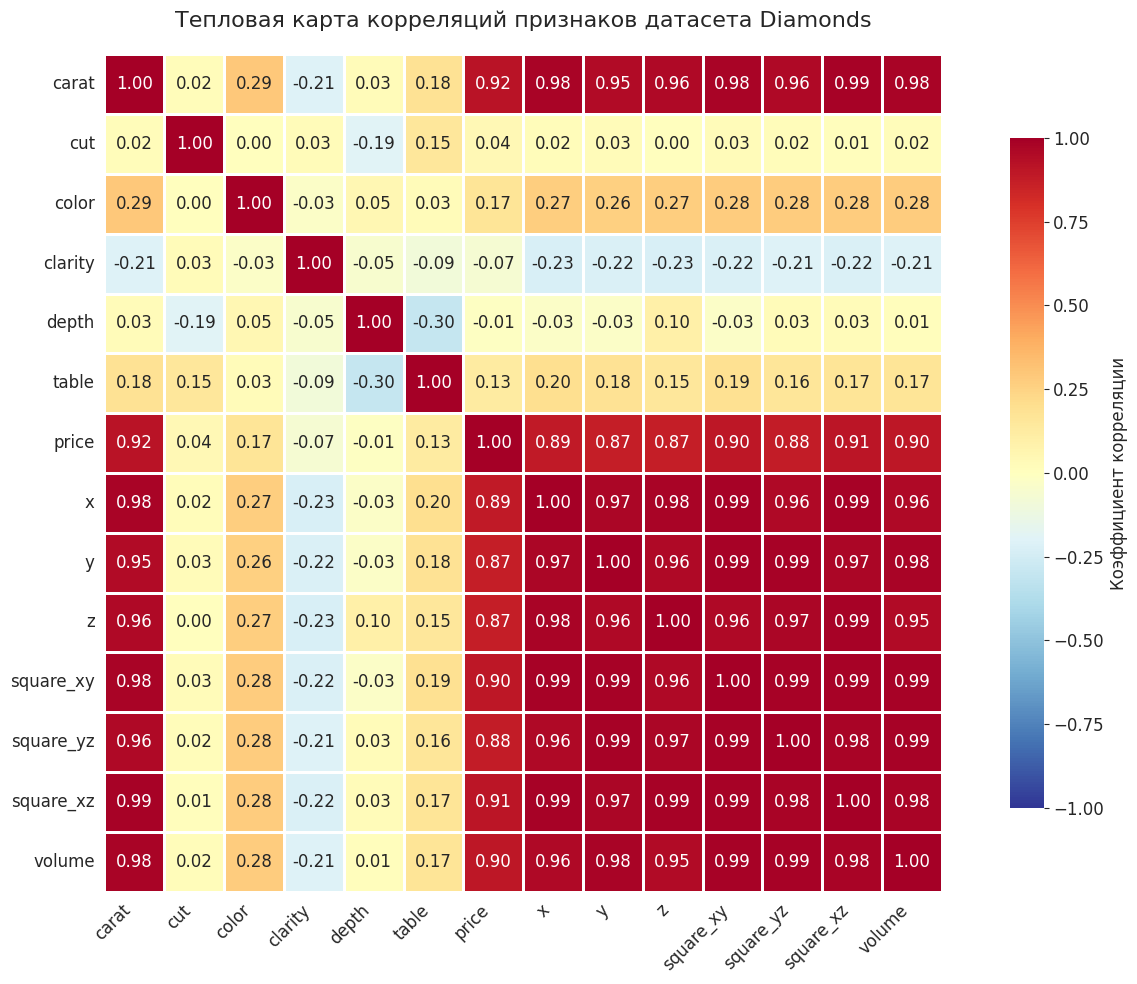

In [14]:
# Построение тепловой карты корреляций
print("=" * 60)
print("ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ")
print("=" * 60)

# Вычисляем матрицу корреляций
corr_matrix = df_processed.corr().round(2)

# Строим heatmap
fig, ax = plt.subplots(figsize=(14, 10))

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdYlBu_r',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции"},
    vmin=-1,
    vmax=1,
    ax=ax
)

ax.set_title('Тепловая карта корреляций признаков датасета Diamonds', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Корреляция признаков с целевой переменной (price)
print("\nКорреляция признаков с целевой переменной 'price':")
print("-" * 45)
corr_with_price = corr_matrix['price'].drop('price').sort_values(ascending=False)
for feature, corr_val in corr_with_price.items():
    bar = '█' * int(abs(corr_val) * 30)
    sign = '+' if corr_val > 0 else '-'
    print(f"  {feature:>10s}: {corr_val:>6.2f}  [{sign}] {bar}")


Корреляция признаков с целевой переменной 'price':
---------------------------------------------
       carat:   0.92  [+] ███████████████████████████
   square_xz:   0.91  [+] ███████████████████████████
   square_xy:   0.90  [+] ███████████████████████████
      volume:   0.90  [+] ███████████████████████████
           x:   0.89  [+] ██████████████████████████
   square_yz:   0.88  [+] ██████████████████████████
           y:   0.87  [+] ██████████████████████████
           z:   0.87  [+] ██████████████████████████
       color:   0.17  [+] █████
       table:   0.13  [+] ███
         cut:   0.04  [+] █
       depth:  -0.01  [-] 
     clarity:  -0.07  [-] ██


## Обучение моделей

In [19]:
print("=" * 60)
print("ОБУЧЕНИЕ МОДЕЛЕЙ")
print("=" * 60)

from sklearn.model_selection import GridSearchCV

# Словарь для хранения моделей и результатов
models = {}
predictions = {}
grid_results = {}

# ─────────────────────────────────────────────
# Модель 1: LinearRegression (МНК)
# ─────────────────────────────────────────────
print("\n" + "─" * 50)
print("Модель 1: LinearRegression (метод наименьших квадратов)")
print("─" * 50)

# lr_params = {
#     'fit_intercept': [True, False],
#     'copy_X': [True],
#     'positive': [True, False]
# }
lr_params = {
    'fit_intercept': [True],
    'copy_X': [True],
    'positive': [True]
}

lr_grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=lr_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

lr_grid.fit(X_train_scaled, y_train)
grid_results['LinearRegression'] = lr_grid

lr_model = lr_grid.best_estimator_
models['LinearRegression'] = lr_model

print(f"Лучшие параметры: {lr_grid.best_params_}")
print(f"Лучший R² на кросс-валидации: {lr_grid.best_score_:.4f}")

print(f"\nКоэффициенты модели (веса признаков):")
coef_df = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': lr_model.coef_.round(2)
}).sort_values(by='Коэффициент', key=abs, ascending=False)
print(coef_df.to_string(index=False))

ОБУЧЕНИЕ МОДЕЛЕЙ

──────────────────────────────────────────────────
Модель 1: LinearRegression (метод наименьших квадратов)
──────────────────────────────────────────────────
Лучшие параметры: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Лучший R² на кросс-валидации: 0.8212

Коэффициенты модели (веса признаков):
  Признак  Коэффициент
    carat      3607.65
  clarity       524.27
   volume       176.06
      cut        82.76
    color         0.00
    depth         0.00
    table         0.00
        y         0.00
        x         0.00
        z         0.00
square_xy         0.00
square_yz         0.00
square_xz         0.00


In [20]:
# ─────────────────────────────────────────────
# Модель 2: SGDRegressor (стохастический градиентный спуск)
# ─────────────────────────────────────────────
print("─" * 50)
print("Модель 2: SGDRegressor (стохастический градиентный спуск)")
print("─" * 50)

# sgd_params = {
#     'alpha': [0.00001, 0.0001, 0.001, 0.01],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'learning_rate': ['adaptive'],
#     'eta0': [0.0001, 0.001, 0.01],
#     'tol': [1e-3, 1e-4, 1e-5],
# }
sgd_params = {
    'alpha': [0.01],
    'penalty': ['l2'],
    'learning_rate': ['adaptive'],
    'eta0': [0.0001],
    'tol': [1e-3]
}

sgd_grid = GridSearchCV(
    estimator=SGDRegressor(random_state=42, max_iter=100),
    param_grid=sgd_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

sgd_grid.fit(X_train_scaled, y_train)
grid_results['SGDRegressor'] = sgd_grid

sgd_model = sgd_grid.best_estimator_
models['SGDRegressor'] = sgd_model

print(f"Лучшие параметры: {sgd_grid.best_params_}")
print(f"Лучший R² на кросс-валидации: {sgd_grid.best_score_:.4f}")
print(f"Количество итераций: {sgd_model.n_iter_}")

print(f"\nКоэффициенты модели (веса признаков):")
coef_df_sgd = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': sgd_model.coef_.round(2)
}).sort_values(by='Коэффициент', key=abs, ascending=False)
print(coef_df_sgd.to_string(index=False))

──────────────────────────────────────────────────
Модель 2: SGDRegressor (стохастический градиентный спуск)
──────────────────────────────────────────────────
Лучшие параметры: {'alpha': 0.01, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'penalty': 'l2', 'tol': 0.001}
Лучший R² на кросс-валидации: 0.8568
Количество итераций: 67

Коэффициенты модели (веса признаков):
  Признак  Коэффициент
    carat      2622.65
square_xz      1244.08
   volume      1183.75
        y     -1175.61
square_xy       696.61
  clarity       497.49
    color      -436.41
        z      -338.52
square_yz      -187.31
    table      -175.18
        x      -159.05
    depth      -136.64
      cut        79.52


In [30]:
# ─────────────────────────────────────────────
# Модель 3: Ridge (L2-регуляризация)
# ─────────────────────────────────────────────
print("─" * 50)
print("Модель 3: Ridge (линейная регрессия с L2-регуляризацией)")
print("─" * 50)

# ridge_params = {
#     'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
#     'fit_intercept': [True, False],
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
# }
ridge_params = {
    'alpha': [100.0],
    'fit_intercept': [True],
    'solver': ['auto']
}

ridge_grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=ridge_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

ridge_grid.fit(X_train_scaled, y_train)
grid_results['Ridge'] = ridge_grid

ridge_model = ridge_grid.best_estimator_
models['Ridge'] = ridge_model

print(f"Лучшие параметры: {ridge_grid.best_params_}")
print(f"Лучший R² на кросс-валидации: {ridge_grid.best_score_:.4f}")

print(f"\nКоэффициенты модели (веса признаков):")
coef_df_ridge = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': ridge_model.coef_.round(2)
}).sort_values(by='Коэффициент', key=abs, ascending=False)
print(coef_df_ridge.to_string(index=False))

──────────────────────────────────────────────────
Модель 3: Ridge (линейная регрессия с L2-регуляризацией)
──────────────────────────────────────────────────
Лучшие параметры: {'alpha': 100.0, 'fit_intercept': True, 'solver': 'auto'}
Лучший R² на кросс-валидации: 0.8299

Коэффициенты модели (веса признаков):
  Признак  Коэффициент
    carat      2940.57
square_xz      1809.49
square_xy      1688.65
        y     -1295.37
        x      -828.12
        z      -733.88
   volume       674.96
  clarity       496.12
    color      -452.79
square_yz      -372.88
    table      -178.58
    depth      -109.10
      cut        76.91



СРАВНЕНИЕ КОЭФФИЦИЕНТОВ МОДЕЛЕЙ
  Признак  LinearRegression  SGDRegressor    Ridge
    carat           3607.65       2622.65  2940.57
      cut             82.76         79.52    76.91
    color              0.00       -436.41  -452.79
  clarity            524.27        497.49   496.12
    depth              0.00       -136.64  -109.10
    table              0.00       -175.18  -178.58
        x              0.00       -159.05  -828.12
        y              0.00      -1175.61 -1295.37
        z              0.00       -338.52  -733.88
square_xy              0.00        696.61  1688.65
square_yz              0.00       -187.31  -372.88
square_xz              0.00       1244.08  1809.49
   volume            176.06       1183.75   674.96


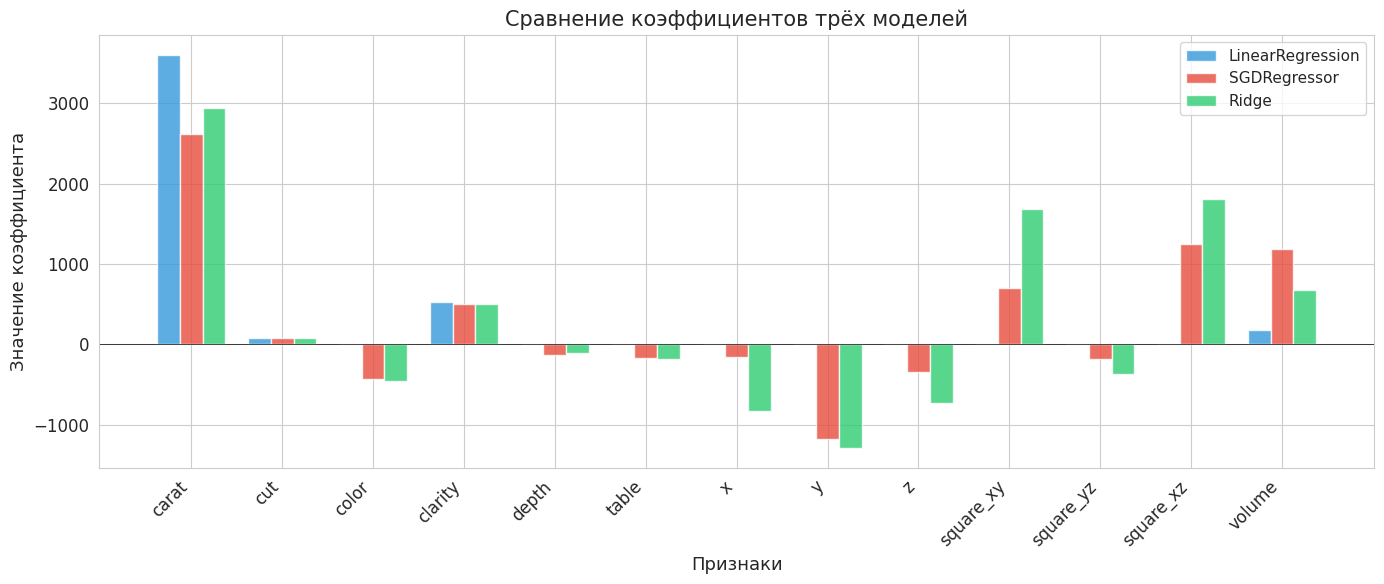

In [31]:
# Сравнение коэффициентов всех моделей
print("\n" + "=" * 60)
print("СРАВНЕНИЕ КОЭФФИЦИЕНТОВ МОДЕЛЕЙ")
print("=" * 60)

coef_comparison = pd.DataFrame({
    'Признак': X.columns,
    'LinearRegression': lr_model.coef_.round(2),
    'SGDRegressor': sgd_model.coef_.round(2),
    'Ridge': ridge_model.coef_.round(2)
})
print(coef_comparison.to_string(index=False))

# Визуализация коэффициентов
fig, ax = plt.subplots(figsize=(14, 6))
x_pos = np.arange(len(X.columns))
width = 0.25

bars1 = ax.bar(x_pos - width, lr_model.coef_, width, label='LinearRegression', color='#3498db', alpha=0.8)
bars2 = ax.bar(x_pos, sgd_model.coef_, width, label='SGDRegressor', color='#e74c3c', alpha=0.8)
bars3 = ax.bar(x_pos + width, ridge_model.coef_, width, label='Ridge', color='#2ecc71', alpha=0.8)

ax.set_xlabel('Признаки', fontsize=13)
ax.set_ylabel('Значение коэффициента', fontsize=13)
ax.set_title('Сравнение коэффициентов трёх моделей', fontsize=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(X.columns, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## Прогнозы моделей

In [32]:
print("=" * 60)
print("ПРОГНОЗЫ МОДЕЛЕЙ")
print("=" * 60)

# Получаем предсказания для каждой модели
for name, model in models.items():
    predictions[name] = model.predict(X_test_scaled)
    print(f"\n{name}:")
    print(f"  Первые 10 предсказаний: {predictions[name][:10].round(2)}")
    print(f"  Первые 10 реальных:     {y_test.values[:10]}")

ПРОГНОЗЫ МОДЕЛЕЙ

LinearRegression:
  Первые 10 предсказаний: [-782.42 7862.88 9162.29 1671.07  445.08 5247.31 3934.85  765.7  2763.92
 7793.69]
  Первые 10 реальных:     [  874  9273 11743  1064   906  3528  2638   894  2247  4548]

SGDRegressor:
  Первые 10 предсказаний: [-597.27 7676.61 9430.87 1692.78  336.3  5301.01 3744.81  815.67 2774.46
 7442.34]
  Первые 10 реальных:     [  874  9273 11743  1064   906  3528  2638   894  2247  4548]

Ridge:
  Первые 10 предсказаний: [-506.03 7654.96 9484.34 1716.24  378.29 5222.42 3656.64  834.61 2711.59
 7422.06]
  Первые 10 реальных:     [  874  9273 11743  1064   906  3528  2638   894  2247  4548]


In [33]:
# Таблица сравнения предсказаний с реальными значениями
print("\nСравнительная таблица предсказаний (первые 15 объектов):")
print("-" * 80)

comparison_df = pd.DataFrame({
    'Реальная цена': y_test.values[:15],
    'LinearRegression': predictions['LinearRegression'][:15].round(2),
    'SGDRegressor': predictions['SGDRegressor'][:15].round(2),
    'Ridge': predictions['Ridge'][:15].round(2)
})

# Добавляем отклонения
for name in models.keys():
    comparison_df[f'Δ {name}'] = (comparison_df[name] - comparison_df['Реальная цена']).round(2)

comparison_df


Сравнительная таблица предсказаний (первые 15 объектов):
--------------------------------------------------------------------------------


,Реальная цена,LinearRegression,SGDRegressor,Ridge,Δ LinearRegression,Δ SGDRegressor,Δ Ridge
0,874,-782.42,-597.27,-506.03,-1656.42,-1471.27,-1380.03
1,9273,7862.88,7676.61,7654.96,-1410.12,-1596.39,-1618.04
2,11743,9162.29,9430.87,9484.34,-2580.71,-2312.13,-2258.66
3,1064,1671.07,1692.78,1716.24,607.07,628.78,652.24
4,906,445.08,336.30,378.29,-460.92,-569.70,-527.71
5,3528,5247.31,5301.01,5222.42,1719.31,1773.01,1694.42
6,2638,3934.85,3744.81,3656.64,1296.85,1106.81,1018.64
7,894,765.70,815.67,834.61,-128.30,-78.33,-59.39
8,2247,2763.92,2774.46,2711.59,516.92,527.46,464.59
9,4548,7793.69,7442.34,7422.06,3245.69,2894.34,2874.06


## Визуализация результатов

In [34]:
print("=" * 60)
print("МЕТРИКИ КАЧЕСТВА МОДЕЛЕЙ")
print("=" * 60)

# Вычисляем метрики для каждой модели
metrics_data = []

for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    metrics_data.append({
        'Модель': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4),
        'MAPE (%)': round(mape, 2)
    })

    print(f"\n{'─' * 40}")
    print(f"  {name}")
    print(f"{'─' * 40}")
    print(f"  MAE  (средняя абсолютная ошибка):    {mae:.2f} $")
    print(f"  MSE  (среднеквадратичная ошибка):     {mse:.2f}")
    print(f"  RMSE (корень из MSE):                 {rmse:.2f} $")
    print(f"  R²   (коэффициент детерминации):      {r2:.4f}")
    print(f"  MAPE (средняя абс. % ошибка):         {mape:.2f}%")

metrics_df = pd.DataFrame(metrics_data)
print(f"\n{'=' * 60}")
print("СВОДНАЯ ТАБЛИЦА МЕТРИК")
print("=" * 60)
metrics_df

МЕТРИКИ КАЧЕСТВА МОДЕЛЕЙ

────────────────────────────────────────
  LinearRegression
────────────────────────────────────────
  MAE  (средняя абсолютная ошибка):    952.09 $
  MSE  (среднеквадратичная ошибка):     2040230.54
  RMSE (корень из MSE):                 1428.37 $
  R²   (коэффициент детерминации):      0.8727
  MAPE (средняя абс. % ошибка):         39.93%

────────────────────────────────────────
  SGDRegressor
────────────────────────────────────────
  MAE  (средняя абсолютная ошибка):    868.85 $
  MSE  (среднеквадратичная ошибка):     1772653.33
  RMSE (корень из MSE):                 1331.41 $
  R²   (коэффициент детерминации):      0.8894
  MAPE (средняя абс. % ошибка):         38.40%

────────────────────────────────────────
  Ridge
────────────────────────────────────────
  MAE  (средняя абсолютная ошибка):    846.88 $
  MSE  (среднеквадратичная ошибка):     1710308.33
  RMSE (корень из MSE):                 1307.79 $
  R²   (коэффициент детерминации):      0.8933
  

,Модель,MAE,MSE,RMSE,R²,MAPE (%)
0,LinearRegression,952.09,2040230.54,1428.37,0.8727,39.93
1,SGDRegressor,868.85,1772653.33,1331.41,0.8894,38.40
2,Ridge,846.88,1710308.33,1307.79,0.8933,37.14


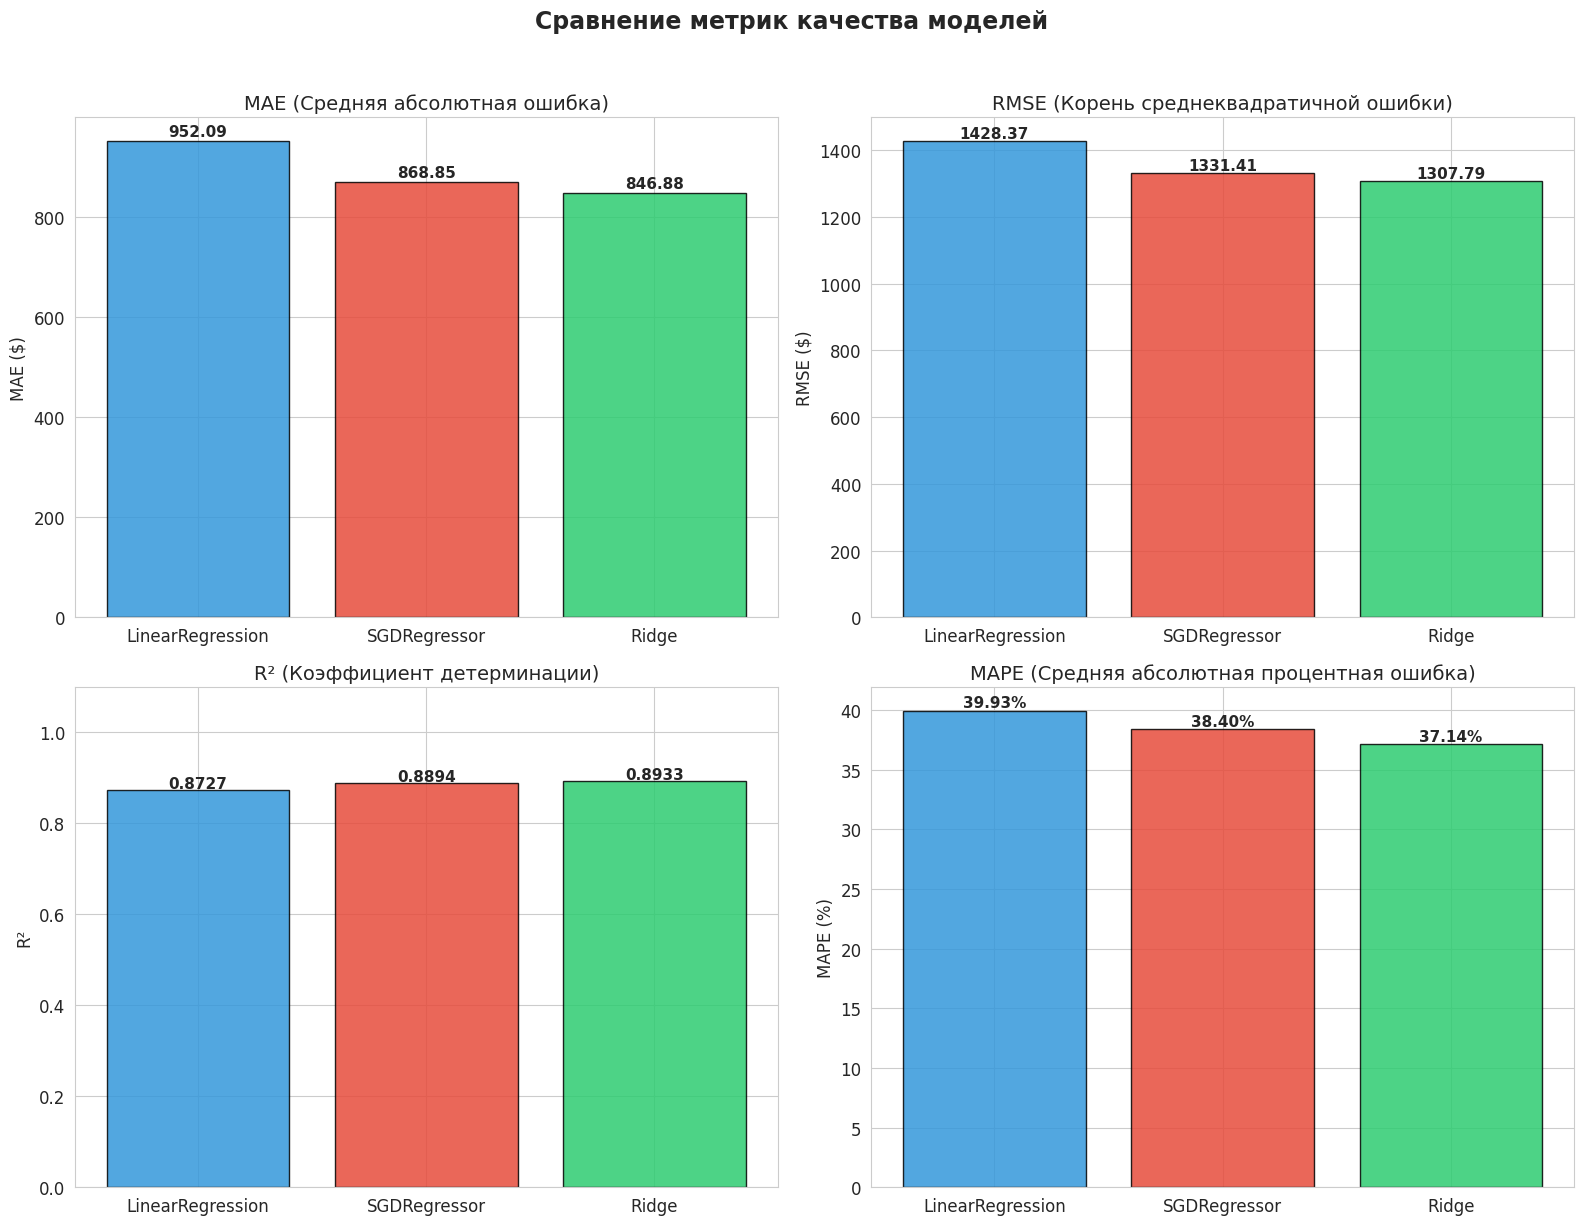

In [35]:
# ═══════════════════════════════════════════════════════════
# ГРАФИК 1: Сравнение метрик (столбчатая диаграмма)
# ═══════════════════════════════════════════════════════════

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

colors = ['#3498db', '#e74c3c', '#2ecc71']
model_names = list(models.keys())

# MAE
axes[0, 0].bar(model_names, metrics_df['MAE'], color=colors, alpha=0.85, edgecolor='black')
for i, v in enumerate(metrics_df['MAE']):
    axes[0, 0].text(i, v + 10, f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)
axes[0, 0].set_title('MAE (Средняя абсолютная ошибка)', fontsize=14)
axes[0, 0].set_ylabel('MAE ($)', fontsize=12)

# RMSE
axes[0, 1].bar(model_names, metrics_df['RMSE'], color=colors, alpha=0.85, edgecolor='black')
for i, v in enumerate(metrics_df['RMSE']):
    axes[0, 1].text(i, v + 10, f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)
axes[0, 1].set_title('RMSE (Корень среднеквадратичной ошибки)', fontsize=14)
axes[0, 1].set_ylabel('RMSE ($)', fontsize=12)

# R²
axes[1, 0].bar(model_names, metrics_df['R²'], color=colors, alpha=0.85, edgecolor='black')
for i, v in enumerate(metrics_df['R²']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)
axes[1, 0].set_title('R² (Коэффициент детерминации)', fontsize=14)
axes[1, 0].set_ylabel('R²', fontsize=12)
axes[1, 0].set_ylim(0, 1.1)

# MAPE
axes[1, 1].bar(model_names, metrics_df['MAPE (%)'], color=colors, alpha=0.85, edgecolor='black')
for i, v in enumerate(metrics_df['MAPE (%)']):
    axes[1, 1].text(i, v + 0.3, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=11)
axes[1, 1].set_title('MAPE (Средняя абсолютная процентная ошибка)', fontsize=14)
axes[1, 1].set_ylabel('MAPE (%)', fontsize=12)

plt.suptitle('Сравнение метрик качества моделей', fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

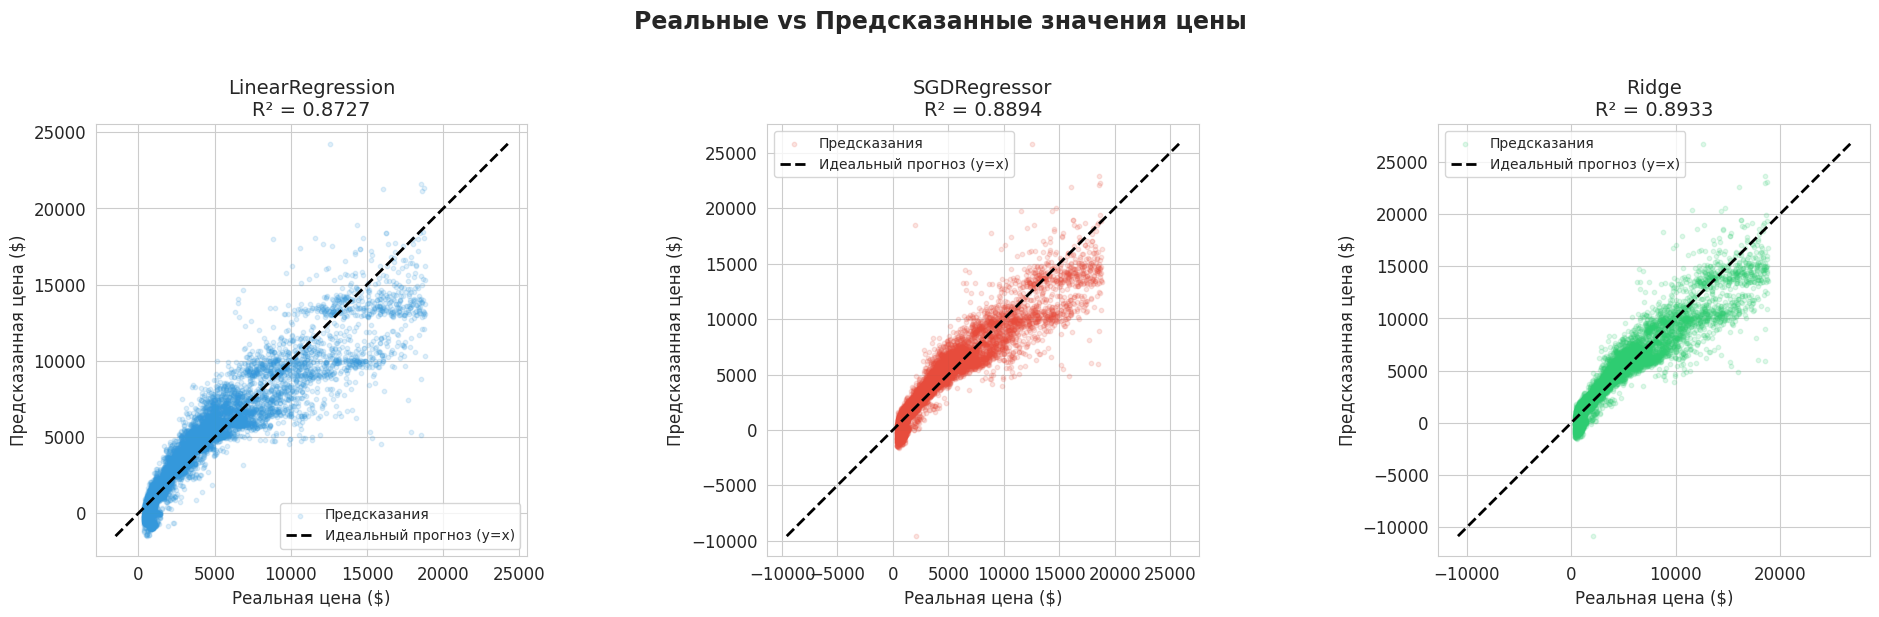

In [36]:
# ═══════════════════════════════════════════════════════════
# ГРАФИК 2: Реальные vs Предсказанные значения (scatter)
# ═══════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    r2 = r2_score(y_test, y_pred)

    ax.scatter(y_test, y_pred, alpha=0.15, s=10, color=colors[idx], label=f'Предсказания')
    # Идеальная линия (y = x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Идеальный прогноз (y=x)')

    ax.set_xlabel('Реальная цена ($)', fontsize=12)
    ax.set_ylabel('Предсказанная цена ($)', fontsize=12)
    ax.set_title(f'{name}\nR² = {r2:.4f}', fontsize=14)
    ax.legend(fontsize=10)
    ax.set_aspect('equal', adjustable='box')

plt.suptitle('Реальные vs Предсказанные значения цены', fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

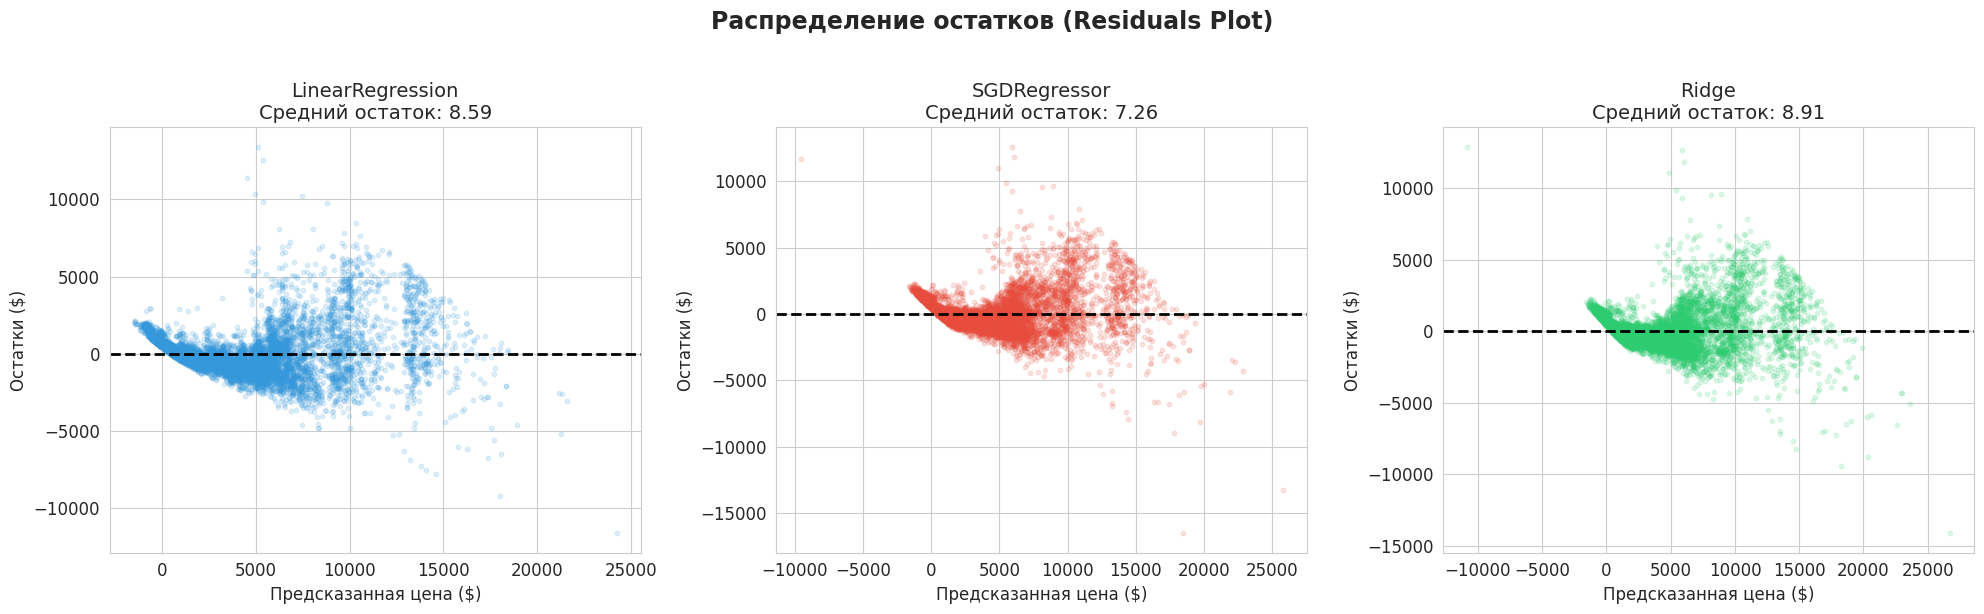

In [37]:
# ═══════════════════════════════════════════════════════════
# ГРАФИК 3: Распределение остатков (residuals)
# ═══════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    residuals = y_test.values - y_pred

    ax.scatter(y_pred, residuals, alpha=0.15, s=10, color=colors[idx])
    ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
    ax.set_xlabel('Предсказанная цена ($)', fontsize=12)
    ax.set_ylabel('Остатки ($)', fontsize=12)
    ax.set_title(f'{name}\nСредний остаток: {residuals.mean():.2f}', fontsize=14)

plt.suptitle('Распределение остатков (Residuals Plot)', fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

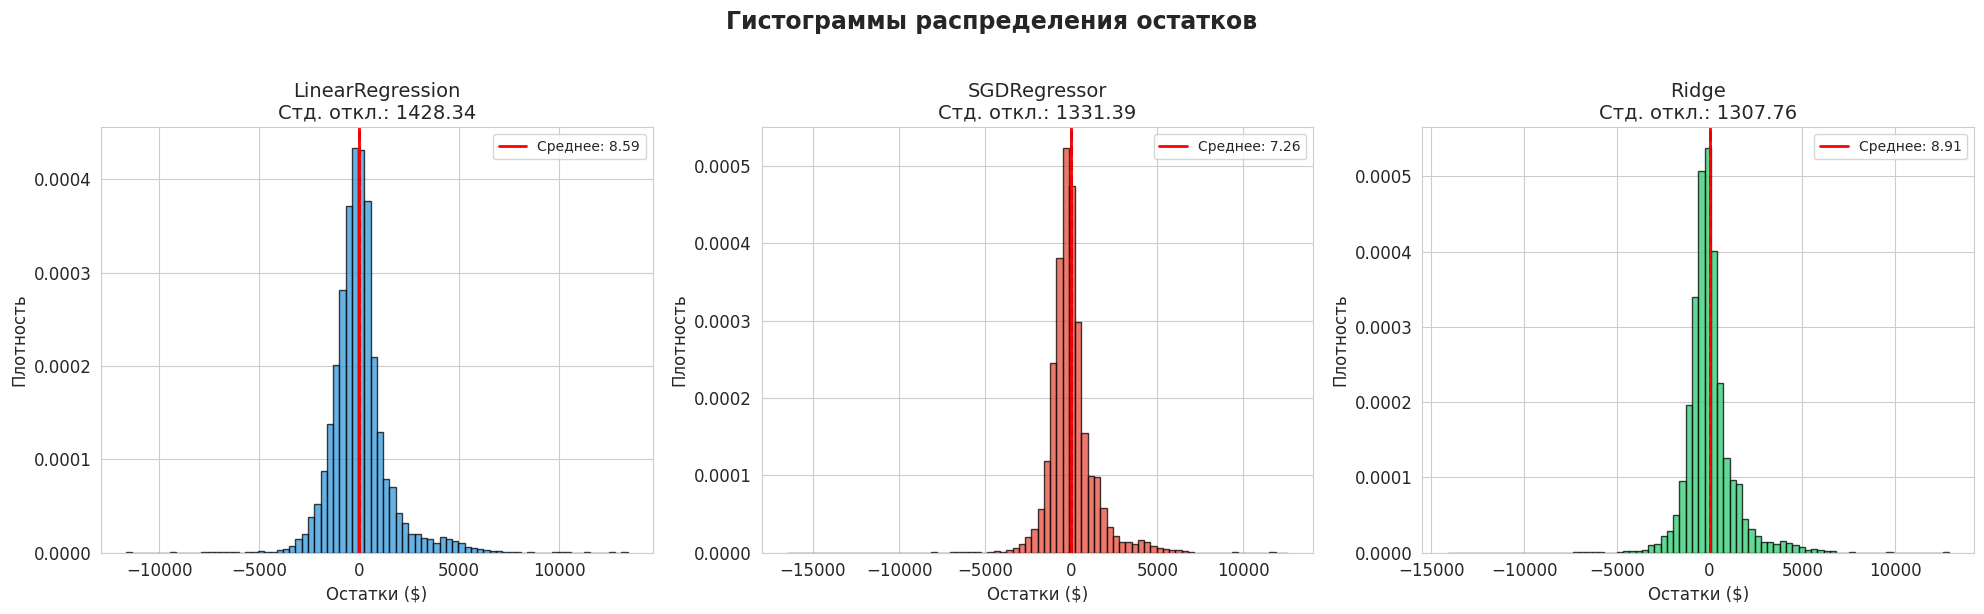

In [38]:
# ═══════════════════════════════════════════════════════════
# ГРАФИК 4: Гистограммы остатков
# ═══════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    residuals = y_test.values - y_pred

    ax.hist(residuals, bins=80, color=colors[idx], alpha=0.75, edgecolor='black', density=True)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
    ax.axvline(x=residuals.mean(), color='red', linestyle='-', linewidth=2, label=f'Среднее: {residuals.mean():.2f}')
    ax.set_xlabel('Остатки ($)', fontsize=12)
    ax.set_ylabel('Плотность', fontsize=12)
    ax.set_title(f'{name}\nСтд. откл.: {residuals.std():.2f}', fontsize=14)
    ax.legend(fontsize=10)

plt.suptitle('Гистограммы распределения остатков', fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

ЛИНИЯ РЕГРЕССИИ ПО САМОМУ ЗНАЧИМОМУ ПРИЗНАКУ

Рейтинг значимости признаков (по абсолютному коэффициенту LinearRegression):
  Признак  Абс. коэффициент
    carat       3607.645716
  clarity        524.266724
   volume        176.056695
      cut         82.760916
    color          0.000000
    depth          0.000000
    table          0.000000
        y          0.000000
        x          0.000000
        z          0.000000
square_xy          0.000000
square_yz          0.000000
square_xz          0.000000

Самый значимый признак: carat (коэффициент: 3607.65)


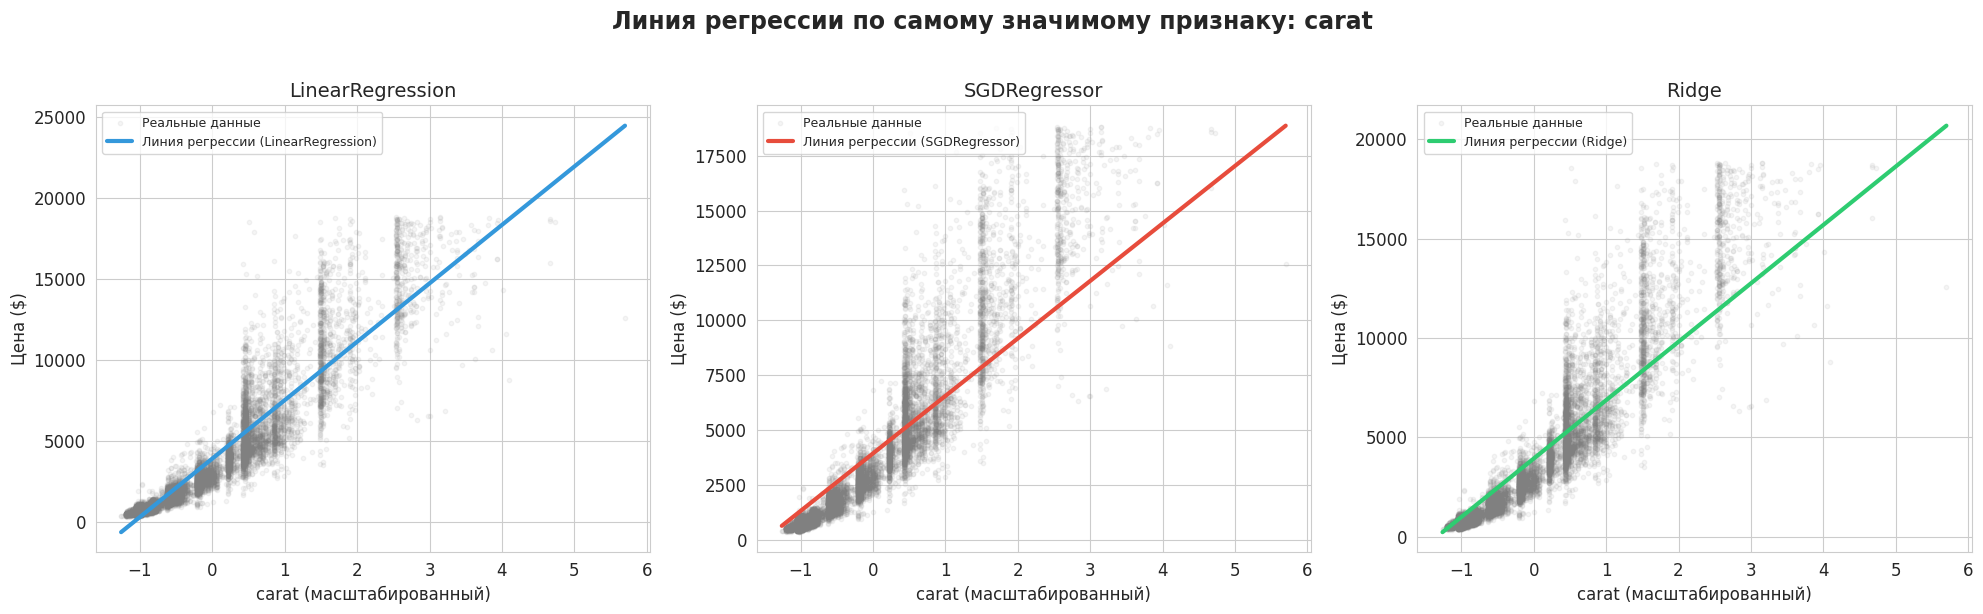

In [48]:
# ═══════════════════════════════════════════════════════════
# ГРАФИК 5: Линия регрессии по самому значимому признаку
# ═══════════════════════════════════════════════════════════

print("=" * 60)
print("ЛИНИЯ РЕГРЕССИИ ПО САМОМУ ЗНАЧИМОМУ ПРИЗНАКУ")
print("=" * 60)

# Определяем самый значимый признак по абсолютному значению коэффициента LinearRegression
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Абс. коэффициент': np.abs(lr_model.coef_)
}).sort_values('Абс. коэффициент', ascending=False)

most_important_feature = feature_importance.iloc[0]['Признак']
most_important_coef = lr_model.coef_[list(X.columns).index(most_important_feature)]

print(f"\nРейтинг значимости признаков (по абсолютному коэффициенту LinearRegression):")
print(feature_importance.to_string(index=False))
print(f"\nСамый значимый признак: {most_important_feature} (коэффициент: {most_important_coef:.2f})")

# Индекс самого значимого признака
feature_idx = list(X.columns).index(most_important_feature)

# ─────────────────────────────────────────────
# Строим график scatter + линия регрессии
# ─────────────────────────────────────────────

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71']
model_names = list(models.keys())

# Значения самого значимого признака из тестовой выборки (масштабированные)
X_feature_scaled = X_test_scaled[:, feature_idx]

# Для построения линии регрессии создаём диапазон значений признака
x_range = np.linspace(X_feature_scaled.min(), X_feature_scaled.max(), 300)

for idx, (name, model) in enumerate(models.items()):
    ax = axes[idx]

    # Scatter реальных данных
    ax.scatter(
        X_feature_scaled, y_test,
        alpha=0.08, s=10, color='gray', label='Реальные данные'
    )

    # Для построения линии регрессии фиксируем все признаки на средних значениях (0 после масштабирования)
    # и варьируем только самый значимый
    X_line = np.zeros((len(x_range), X_train_scaled.shape[1]))
    X_line[:, feature_idx] = x_range

    y_line = model.predict(X_line)

    # Линия регрессии
    ax.plot(
        x_range, y_line,
        color=colors[idx], linewidth=3, label=f'Линия регрессии ({name})'
    )

    ax.set_xlabel(f'{most_important_feature} (масштабированный)', fontsize=12)
    ax.set_ylabel('Цена ($)', fontsize=12)
    ax.set_title(f'{name}', fontsize=14)
    ax.legend(fontsize=9, loc='upper left')

plt.suptitle(
    f'Линия регрессии по самому значимому признаку: {most_important_feature}',
    fontsize=17, fontweight='bold', y=1.02
)
plt.tight_layout()
plt.show()